In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question to solve




* How does the number of hours studied correlate with exam scores?
* Is there a relationship between attendance and exam performance?
* How does parental involvement affect exam scores?
* Does access to resources significantly impact students' exam scores?
* Analyze the impact of extracurricular activities on exam performance.
* How does the number of sleep hours affect exam scores?
* Do previous scores predict current exam performance?
* How does motivation level correlate with exam results?
* Is there a significant difference in exam scores between students with and without internet access?
* How do tutoring sessions influence exam performance?
* Examine the effect of family income on students' exam scores.
* How does teacher quality impact student exam performance?
* Compare exam scores between different school types.
* Analyze the impact of peer influence on exam scores.
* Is there a correlation between physical activity and exam performance?
* How do learning disabilities affect exam scores?
* Does the educational level of parents influence students' exam scores?
* Does the distance from home to school affect exam performance?
* Are there significant differences in exam scores between male and female students?
* Identify the top 10% of students based on their exam scores and analyze common factors among them.

In [2]:
def correlation(x,y):
    corelation = x.corr(y)
    if corelation>0 and corelation<0.5:
        print(f"Weak Positive Correlation {corelation}")
    elif corelation>0.5:
        print(f"Positive Correlation {corelation}")
    elif corelation<0 and corelation>0.5:
        print(f"Weak Negative Correlation {corelation}")
    else:
        print(f"Negative Correlation {corelation}")

In [3]:
data = pd.read_csv("StudentPerformanceFactors.csv")
df = data.copy()
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
df.shape

(6607, 20)

In [7]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

Hours_Studied                  0.0%
Attendance                     0.0%
Parental_Involvement           0.0%
Access_to_Resources            0.0%
Extracurricular_Activities     0.0%
Sleep_Hours                    0.0%
Previous_Scores                0.0%
Motivation_Level               0.0%
Internet_Access                0.0%
Tutoring_Sessions              0.0%
Family_Income                  0.0%
Teacher_Quality               1.18%
School_Type                    0.0%
Peer_Influence                 0.0%
Physical_Activity              0.0%
Learning_Disabilities          0.0%
Parental_Education_Level      1.36%
Distance_from_Home            1.01%
Gender                         0.0%
Exam_Score                     0.0%
dtype: object

In [8]:
df['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [9]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

# Handling Missing Value

In [10]:
# Using Mode for Categorical Data

In [11]:
df['Teacher_Quality_mode'] = df['Teacher_Quality'].replace(np.nan,df['Teacher_Quality'].mode()[0])

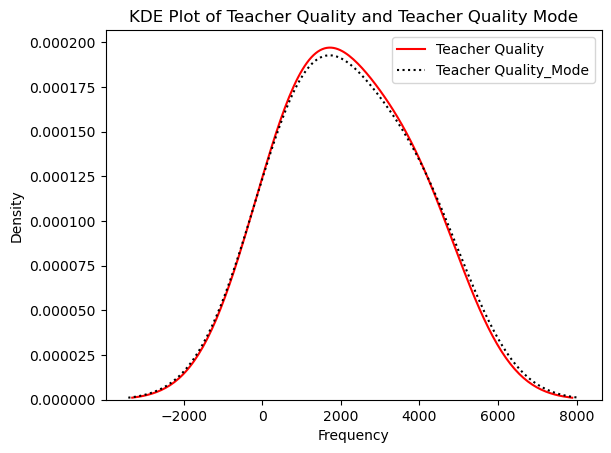

In [12]:
sns.kdeplot(df['Teacher_Quality'].value_counts(),color = "red",label='Teacher Quality')
sns.kdeplot(df['Teacher_Quality_mode'].value_counts(),color = "black",ls = 'dotted',label='Teacher Quality_Mode')

#Adding Legend
plt.legend()

# Show plot
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('KDE Plot of Teacher Quality and Teacher Quality Mode')
plt.show()

In [13]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [14]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [15]:
df['Parental_Education_Level'].mode()

0    High School
Name: Parental_Education_Level, dtype: object

In [16]:
df['Parental_Education_Level_mode']=df['Parental_Education_Level'].replace(np.nan,df['Parental_Education_Level'].mode()[0])

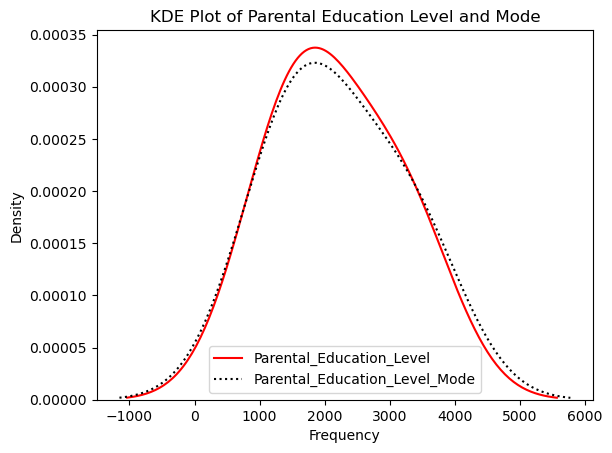

In [17]:
sns.kdeplot(df['Parental_Education_Level'].value_counts(),color='red',label = 'Parental_Education_Level')
sns.kdeplot(df['Parental_Education_Level_mode'].value_counts(),color='black',ls='dotted',label = 'Parental_Education_Level_Mode')

#Adding Legend
plt.legend()

# Show plot
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('KDE Plot of Parental Education Level and Mode')
plt.show()

In [18]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [19]:
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [20]:
df['Distance_from_Home_mode']=df['Distance_from_Home'].replace(np.nan,df['Distance_from_Home'].mode()[0])

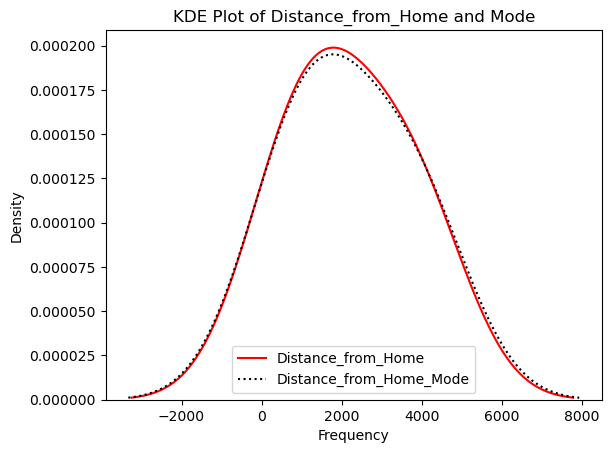

In [21]:
sns.kdeplot(df['Distance_from_Home'].value_counts(),color='red',label = 'Distance_from_Home')
sns.kdeplot(df['Distance_from_Home_mode'].value_counts(),color='black',ls = 'dotted',label = 'Distance_from_Home_Mode')

#Adding Legend
plt.legend()

# Show plot
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('KDE Plot of Distance_from_Home and Mode')
plt.show()

In [22]:
#Removing Null Columns with new Columns

In [23]:
# Removing Teacher Quality Column
df.drop(['Teacher_Quality'],axis = 1 ,inplace =True)
df['Teacher_Quality'] = df['Teacher_Quality_mode']
df.drop(['Teacher_Quality_mode'],axis = 1 ,inplace =True)

In [24]:
# Removing Teacher Quality Column
df.drop(['Parental_Education_Level'],axis = 1 ,inplace =True)
df['Parental_Education_Level'] = df['Parental_Education_Level_mode']
df.drop(['Parental_Education_Level_mode'],axis = 1 ,inplace =True)

In [25]:
# Removing Teacher Quality Column
df.drop(['Distance_from_Home'],axis = 1 ,inplace =True)
df['Distance_from_Home'] = df['Distance_from_Home_mode']
df.drop(['Distance_from_Home_mode'],axis = 1 ,inplace =True)

In [26]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
Teacher_Quality               0
Parental_Education_Level      0
Distance_from_Home            0
dtype: int64

In [27]:
numerical = []
categorical = []

In [28]:
for col in df.columns:
    if df[col].dtype == "O":
        categorical.append(col)
    else:
        numerical.append(col)

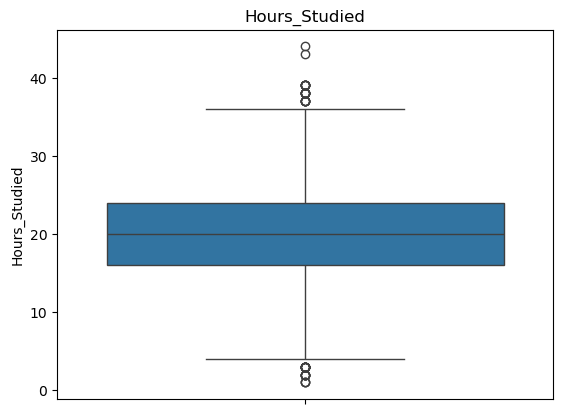

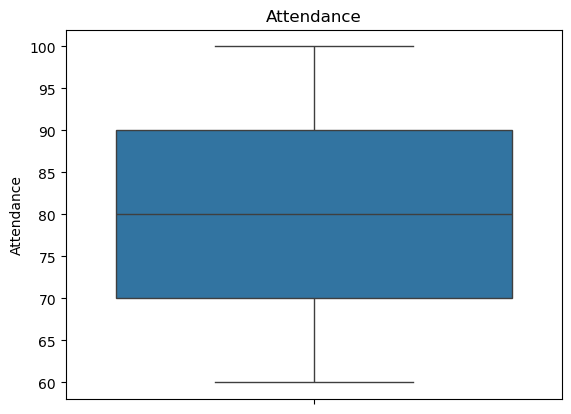

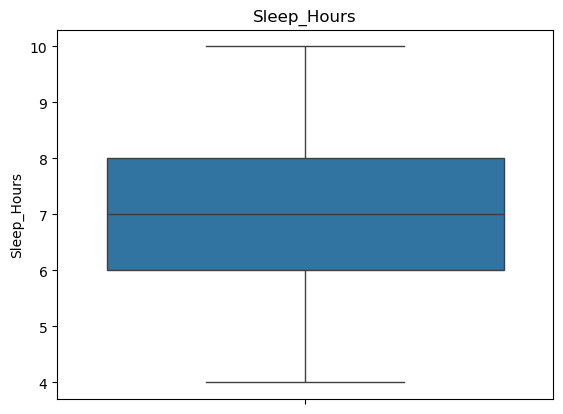

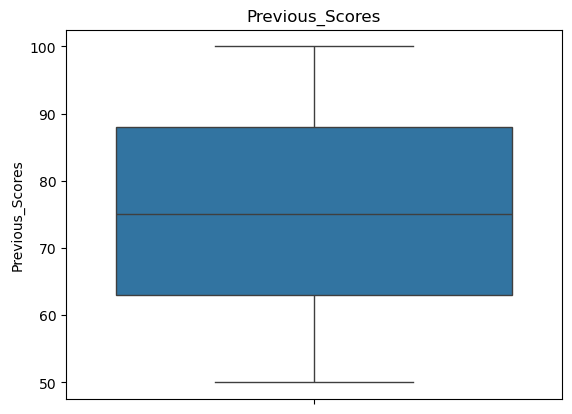

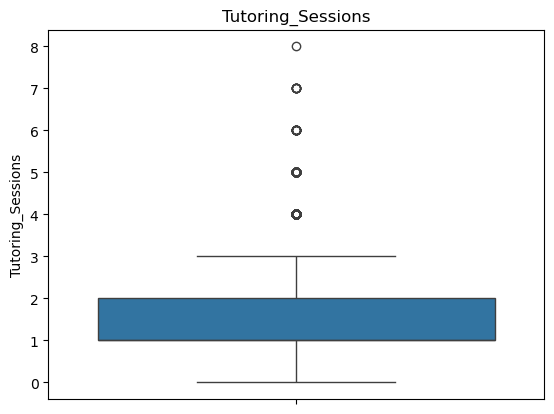

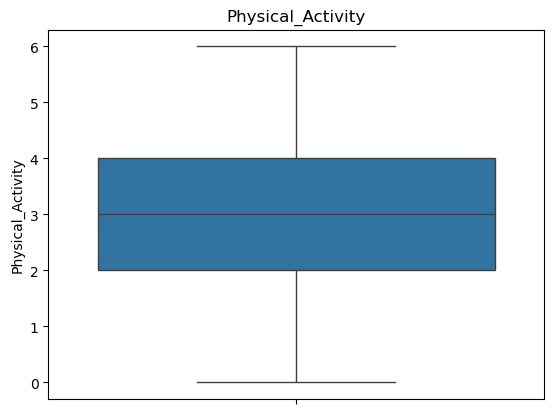

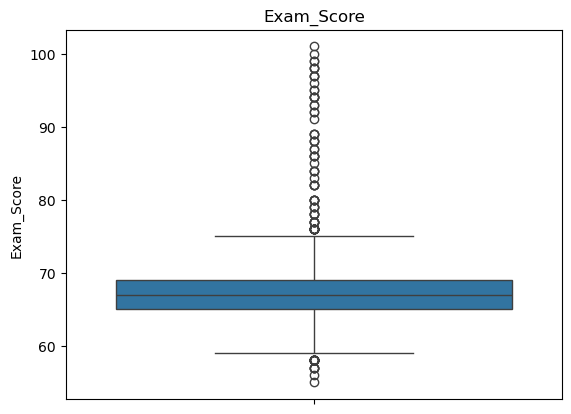

In [29]:
for col in numerical:
    plt.figure()
    plt.title(col)
    sns.boxplot(df[col])

In [30]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

Hours_Studied                 0.0%
Attendance                    0.0%
Parental_Involvement          0.0%
Access_to_Resources           0.0%
Extracurricular_Activities    0.0%
Sleep_Hours                   0.0%
Previous_Scores               0.0%
Motivation_Level              0.0%
Internet_Access               0.0%
Tutoring_Sessions             0.0%
Family_Income                 0.0%
School_Type                   0.0%
Peer_Influence                0.0%
Physical_Activity             0.0%
Learning_Disabilities         0.0%
Gender                        0.0%
Exam_Score                    0.0%
Teacher_Quality               0.0%
Parental_Education_Level      0.0%
Distance_from_Home            0.0%
dtype: object

# How does the number of hours studied correlate with exam scores

In [31]:
corelation = df['Hours_Studied'].corr(df['Exam_Score'])
print(f"Correlation between Hours Studied and Exam Score: {corelation}")

Correlation between Hours Studied and Exam Score: 0.44545495407528213


In [32]:
correlation(df['Hours_Studied'],df['Exam_Score'])

Weak Positive Correlation 0.44545495407528213


# Is there a relationship between attendance and exam performance?

In [33]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67,Medium,High School,Near
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61,Medium,College,Moderate
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71,Medium,High School,Moderate
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70,High,College,Near


In [34]:
attendance = np.array(df['Attendance'])
exam_score = np.array(df['Exam_Score'])

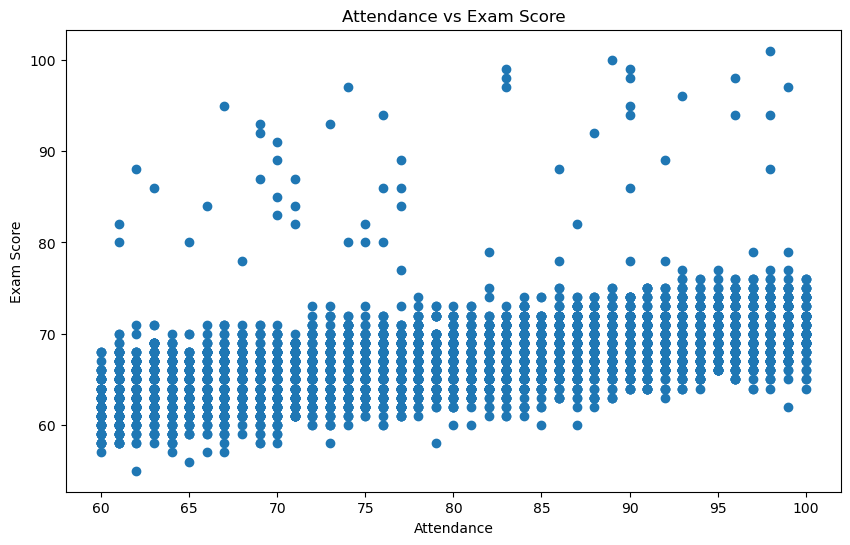

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(attendance,exam_score)
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score')
plt.show()

In [36]:
correlation(df['Attendance'],df['Exam_Score'])

Positive Correlation 0.5810718633120644


In [37]:
# relationship between attendance and exam performance is good. it seems like incresement of Attendance gives good affect on Student Marks.

# How does parental involvement affect exam scores?

In [38]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67,Medium,High School,Near
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61,Medium,College,Moderate
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71,Medium,High School,Moderate
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70,High,College,Near


In [39]:
df['Parental_Involvement_Codes'] = df['Parental_Involvement'].astype('category').cat.codes

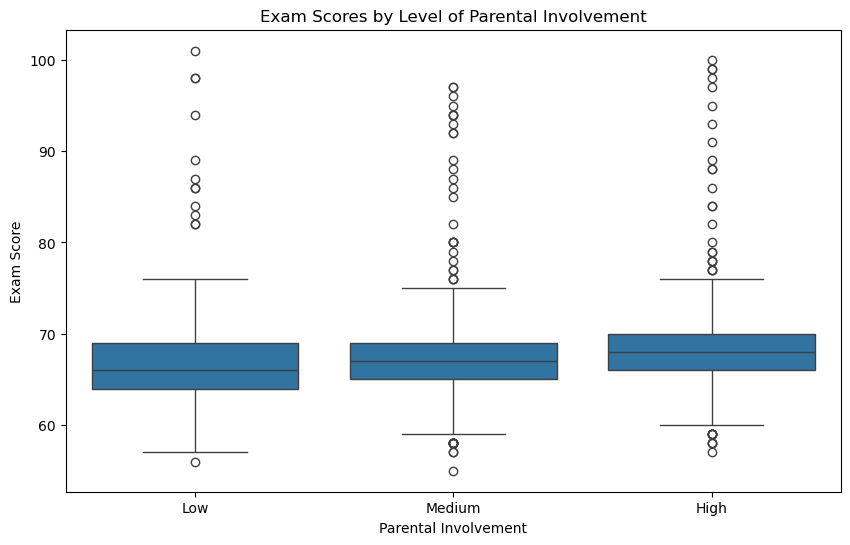

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Parental_Involvement'],y=df['Exam_Score'])
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Level of Parental Involvement')
plt.show()

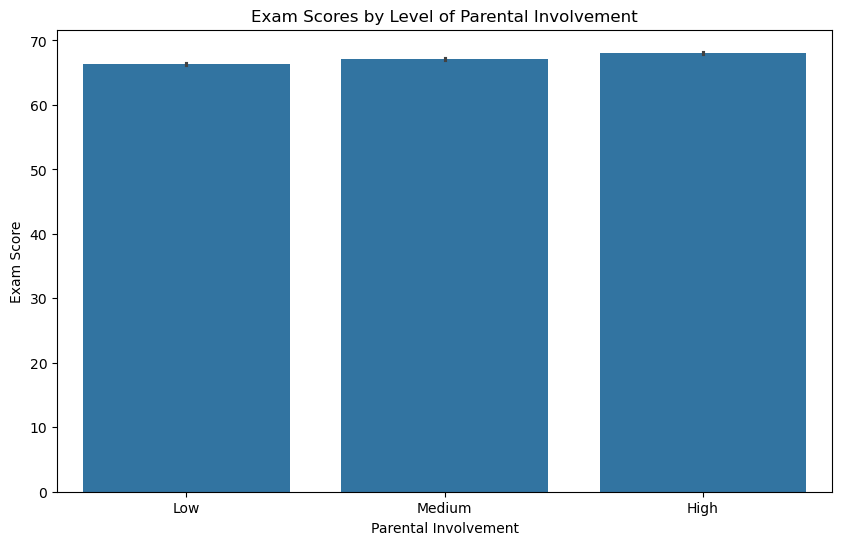

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Parental_Involvement'],y=df['Exam_Score'])
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Level of Parental Involvement')
plt.show()

In [42]:
# parental involvement gives Good affect in exam scores

In [43]:
correlation(df['Parental_Involvement_Codes'],df['Exam_Score'])

Negative Correlation -0.0942886689243013


# Does access to resources significantly impact students' exam scores?

In [44]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Parental_Involvement_Codes
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,Male,67,Medium,High School,Near,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,Female,61,Medium,College,Moderate,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,Male,71,Medium,High School,Moderate,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,Female,70,High,College,Near,2


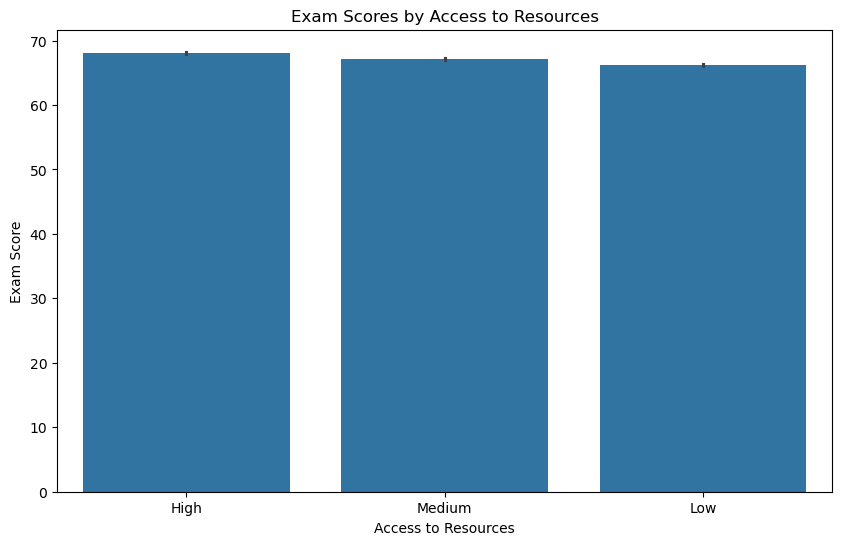

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Access_to_Resources'],y=df['Exam_Score'])
plt.xlabel('Access to Resources')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Access to Resources')
plt.show()

In [46]:
# Access of resources significantly gives Good impact in students' exam scores

In [47]:
atr_encode = df['Access_to_Resources'].astype('category').cat.codes

In [48]:
correlation(atr_encode,df['Exam_Score'])

Negative Correlation -0.09050270339090374


# Analyze the impact of extracurricular activities on exam performance.

In [49]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Parental_Involvement_Codes
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,Male,67,Medium,High School,Near,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,Female,61,Medium,College,Moderate,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,Male,71,Medium,High School,Moderate,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,Female,70,High,College,Near,2


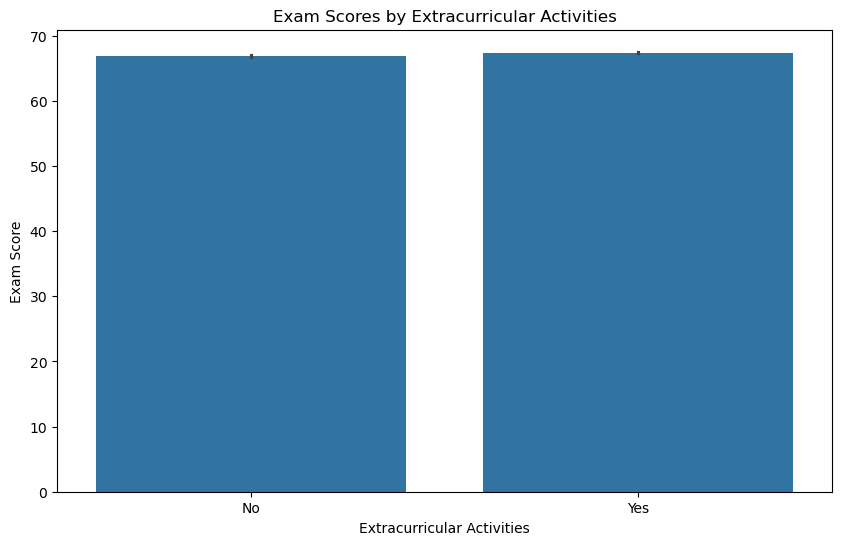

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x =df['Extracurricular_Activities'],y=df['Exam_Score'])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Extracurricular Activities')
plt.show()

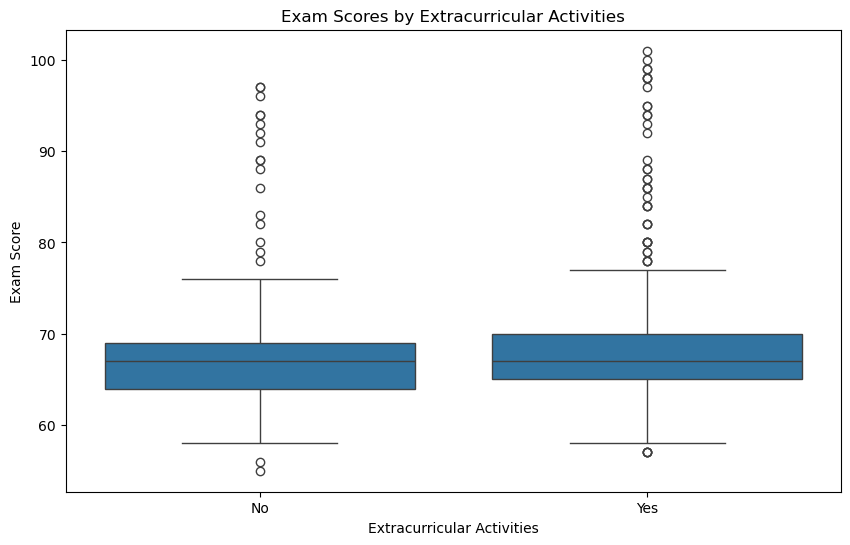

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x =df['Extracurricular_Activities'],y=df['Exam_Score'])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Extracurricular Activities')
plt.show()

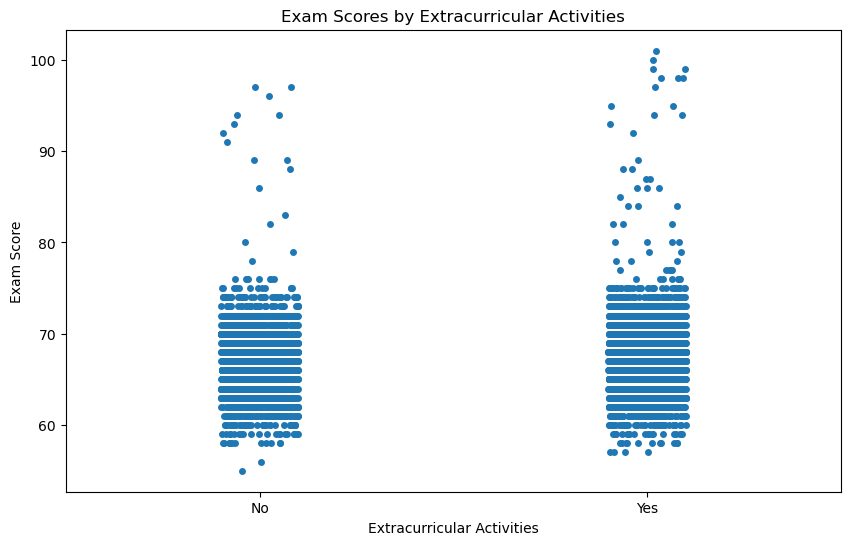

In [52]:
plt.figure(figsize=(10, 6))
sns.stripplot(x =df['Extracurricular_Activities'],y=df['Exam_Score'])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')
plt.title('Exam Scores by Extracurricular Activities')
plt.show()

In [53]:
# Their is Good impact of extracurricular activities on exam performance.

In [54]:
Extracurricular_Activities_code = df['Extracurricular_Activities'].astype('category').cat.codes

In [55]:
correlation(Extracurricular_Activities_code,df['Exam_Score'])

Weak Positive Correlation 0.06438171032751876


# How does the number of sleep hours affect exam scores? 

In [56]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Parental_Involvement_Codes
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,Male,67,Medium,High School,Near,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,Female,61,Medium,College,Moderate,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,Male,71,Medium,High School,Moderate,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,Female,70,High,College,Near,2


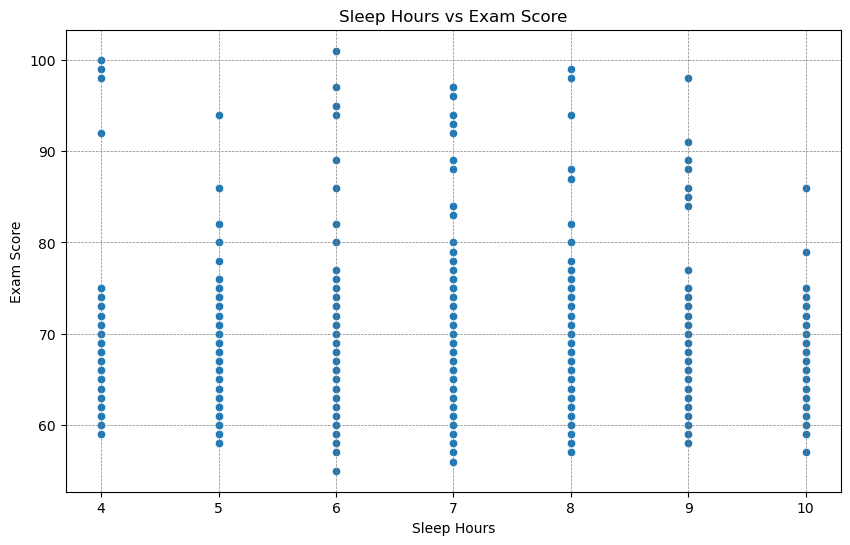

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sleep_Hours'],y=df['Exam_Score'])
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours vs Exam Score')
plt.grid(linestyle='--',color='gray',linewidth=0.5)
plt.show()

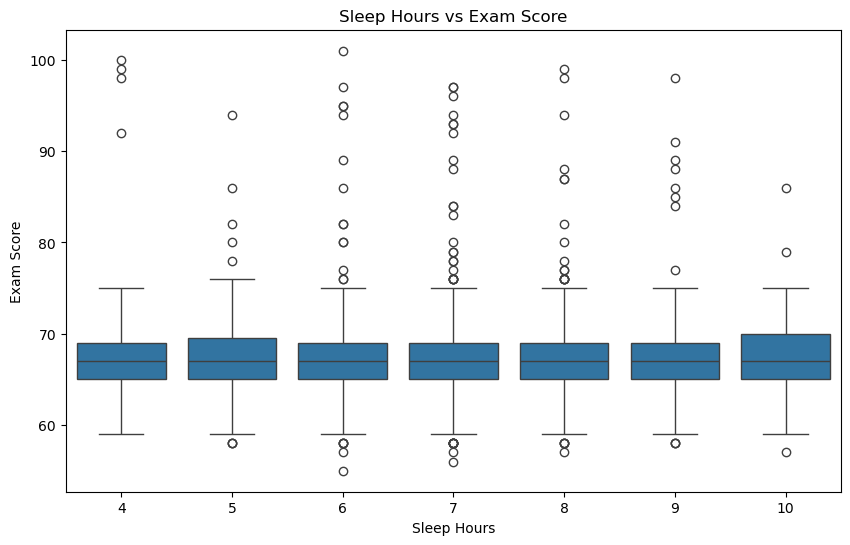

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sleep_Hours'],y=df['Exam_Score'])
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours vs Exam Score')
plt.show()

In [59]:
correlation(df['Sleep_Hours'],df['Exam_Score'])

Negative Correlation -0.017021628571502547


# How does motivation level correlate with exam results?

In [60]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Parental_Involvement_Codes
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,Male,67,Medium,High School,Near,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,Female,61,Medium,College,Moderate,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,Male,71,Medium,High School,Moderate,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,Female,70,High,College,Near,2


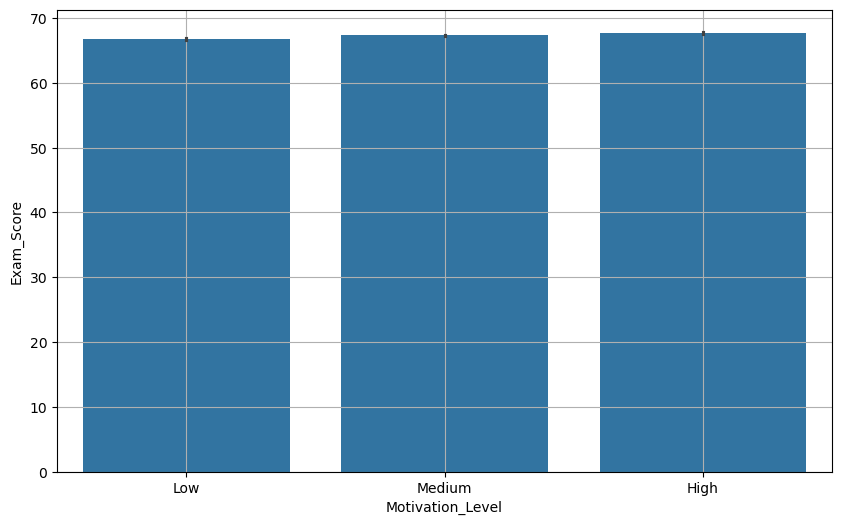

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Motivation_Level'],y=df['Exam_Score'])
plt.grid()

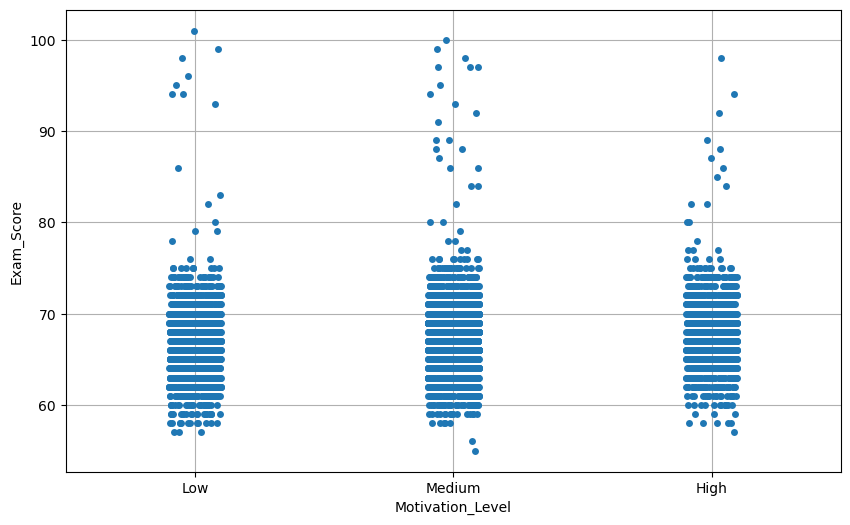

In [62]:
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Motivation_Level'],y=df['Exam_Score'])
plt.grid()

In [63]:
Motivation_Level_code = df['Motivation_Level'].astype('category').cat.codes

In [64]:
correlation(Motivation_Level_code,df['Exam_Score'])

Negative Correlation -0.014910279080521664


# Is there a significant difference in exam scores between students with and without internet access?

In [65]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Parental_Involvement_Codes
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,Male,67,Medium,High School,Near,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,Female,61,Medium,College,Moderate,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,Male,71,Medium,High School,Moderate,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,Female,70,High,College,Near,2


<Axes: xlabel='Internet_Access', ylabel='Exam_Score'>

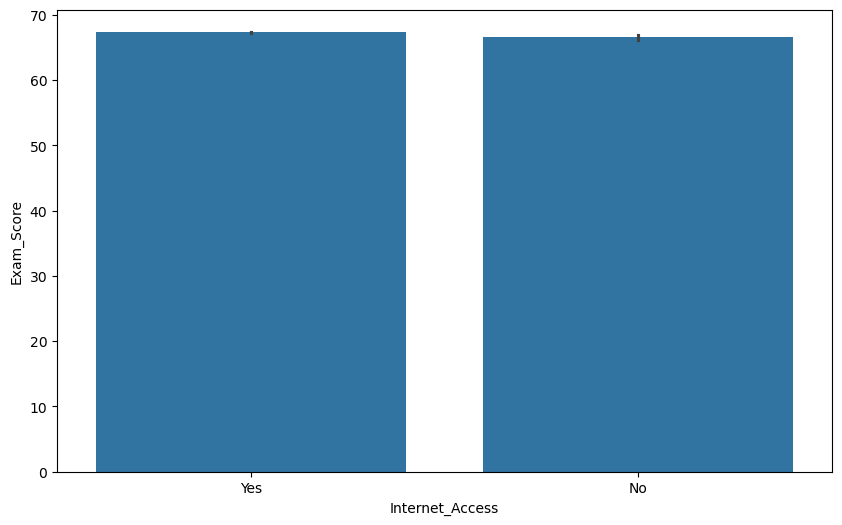

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Internet_Access'],y=df['Exam_Score'])

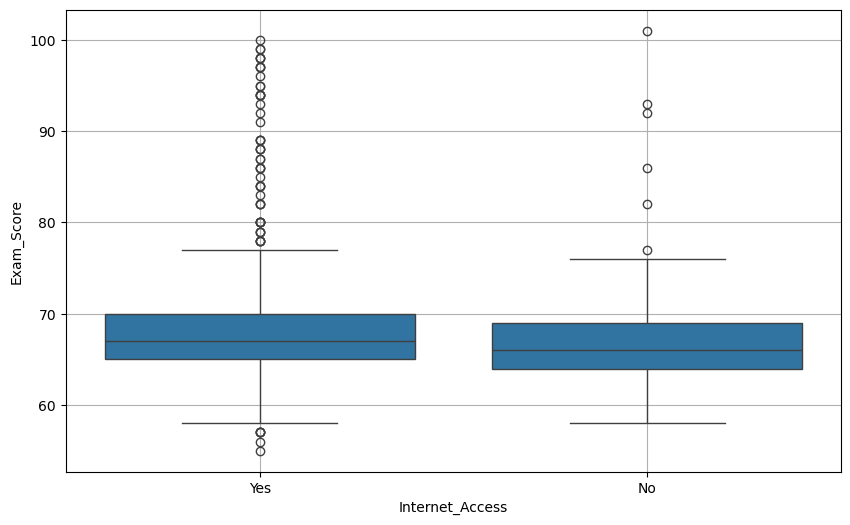

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Internet_Access'],y=df['Exam_Score'])
plt.grid()

In [68]:
Internet_Access_code = df['Internet_Access'].astype('category').cat.codes

In [69]:
correlation(Internet_Access_code,df['Exam_Score'])

Weak Positive Correlation 0.05147501284077543


In [70]:
# A correlation of 0.051 suggests a very weak positive relationship between internet access and exam scores.
# It appears that having internet access does not significantly impact.

# How do tutoring sessions influence exam performance?

In [71]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Parental_Involvement_Codes
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,Male,67,Medium,High School,Near,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,Female,61,Medium,College,Moderate,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Male,74,Medium,Postgraduate,Near,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,Male,71,Medium,High School,Moderate,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,Female,70,High,College,Near,2


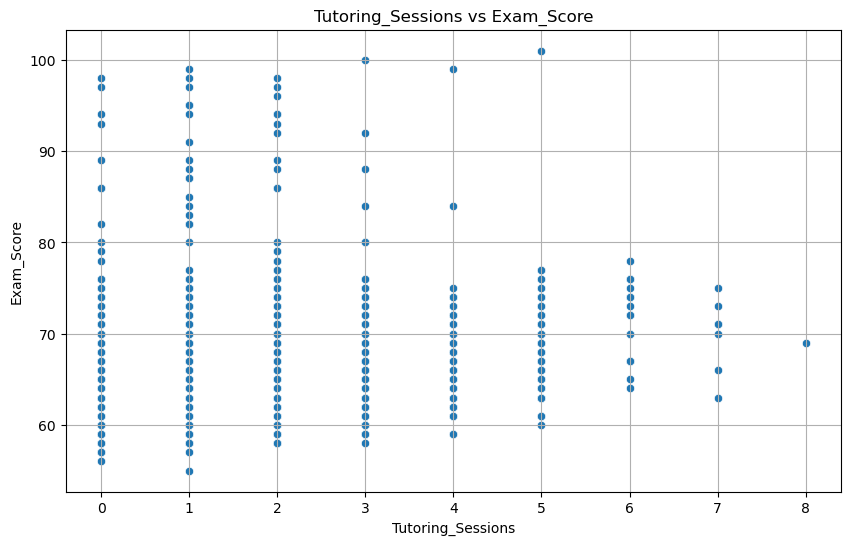

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Tutoring_Sessions'],y=df['Exam_Score'])
plt.title("Tutoring_Sessions vs Exam_Score")
plt.grid()
plt.show()

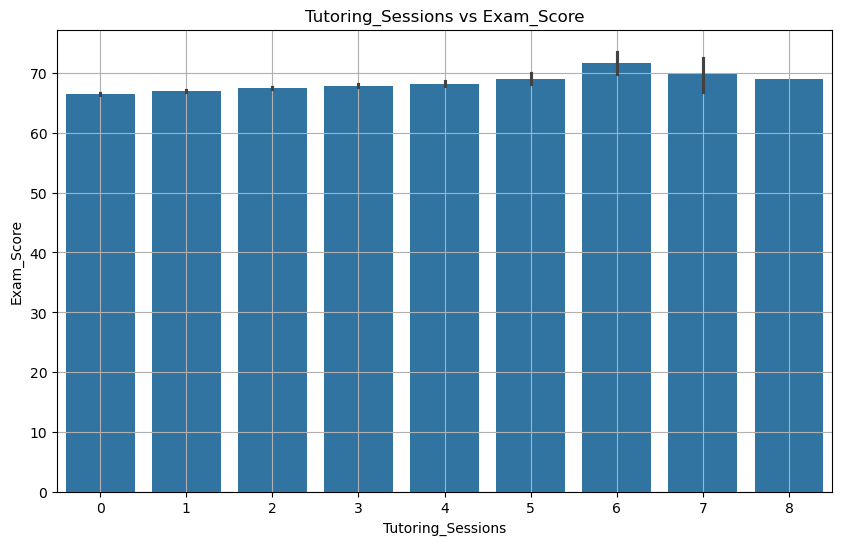

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Tutoring_Sessions'],y=df['Exam_Score'])
plt.title("Tutoring_Sessions vs Exam_Score")
plt.grid()
plt.show()

In [74]:
correlation(df['Tutoring_Sessions'],df['Exam_Score'])

Weak Positive Correlation 0.15652518539225324


# Examine the effect of family income on students' exam scores.

In [75]:
df[['Family_Income','Exam_Score']].head()

,Family_Income,Exam_Score
0,Low,67
1,Medium,61
2,Medium,74
3,Medium,71
4,Medium,70


<Axes: xlabel='Family_Income', ylabel='Exam_Score'>

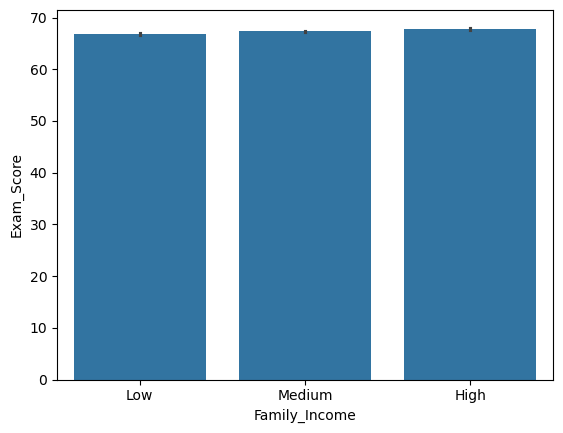

In [76]:
sns.barplot(x=df['Family_Income'],y=df['Exam_Score'])

<Axes: xlabel='Family_Income', ylabel='Exam_Score'>

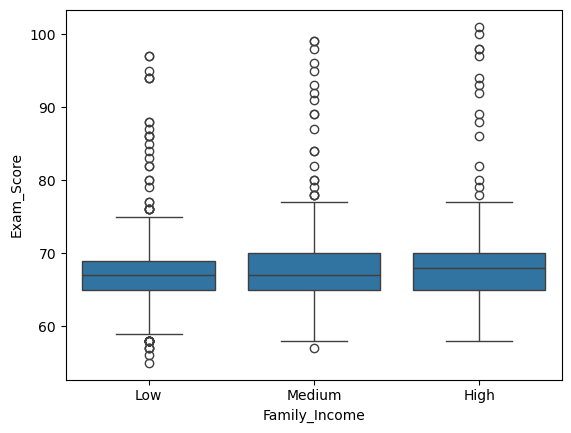

In [77]:
sns.boxplot(x=df['Family_Income'],y=df['Exam_Score'])

In [78]:
Family_income_codes = df['Family_Income'].astype('category').cat.codes

In [79]:
corelation=Family_income_codes.corr(df['Exam_Score'])
print(f"Correlation between Family_income and Exam Score: {corelation}")

Correlation between Family_income and Exam Score: -0.026483748976820504


# How does teacher quality impact student exam performance?

In [80]:
df.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities', 'Gender', 'Exam_Score',
       'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home',
       'Parental_Involvement_Codes'],
      dtype='object')

In [81]:
df[['Teacher_Quality','Exam_Score']].head()

,Teacher_Quality,Exam_Score
0,Medium,67
1,Medium,61
2,Medium,74
3,Medium,71
4,High,70


<Axes: xlabel='Teacher_Quality', ylabel='Exam_Score'>

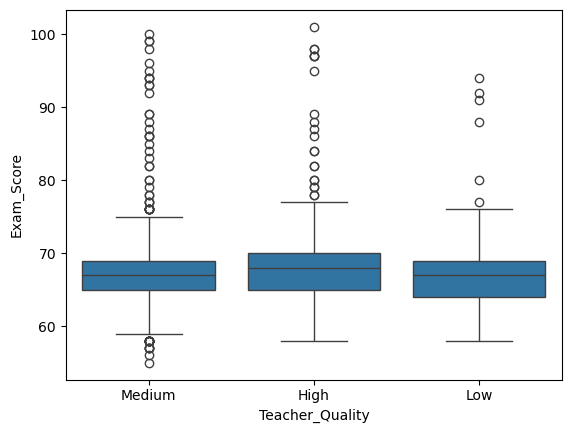

In [82]:
sns.boxplot(x=df['Teacher_Quality'],y=df['Exam_Score'])

In [83]:
Teacher_Quality_codes = df['Teacher_Quality'].astype('category').cat.codes

In [84]:
corelation = Teacher_Quality_codes.corr(df['Exam_Score'])
print(f"Correlation between Teacher Quality and Exam Score: {corelation}")

Correlation between Teacher Quality and Exam Score: -0.060823648601109156


In [85]:
#  -0.061 suggests a very weak negative relationship between teacher quality and exam scores.

# Compare exam scores between different school types.

In [86]:
df[['School_Type','Exam_Score']].head()

,School_Type,Exam_Score
0,Public,67
1,Public,61
2,Public,74
3,Public,71
4,Public,70


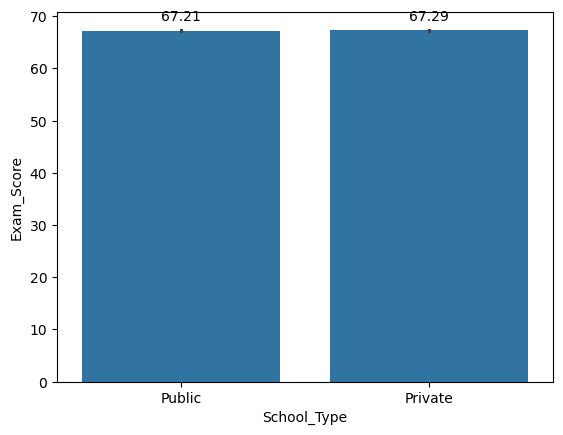

In [87]:
ax = sns.barplot(x=df['School_Type'],y=df['Exam_Score'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

<Axes: xlabel='School_Type', ylabel='Exam_Score'>

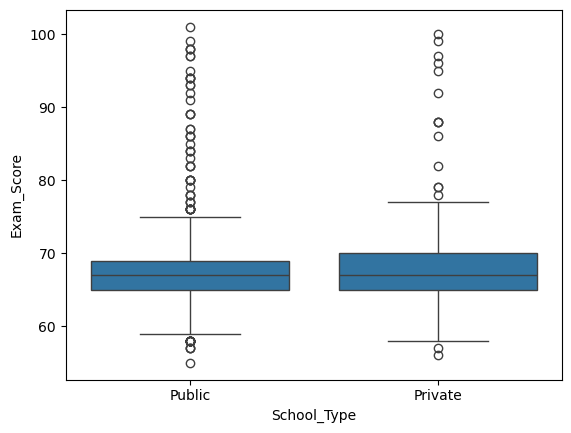

In [88]:
sns.boxplot(x=df['School_Type'],y=df['Exam_Score'])

In [89]:
School_type_code = df['School_Type'].astype('category').cat.codes

In [90]:
corelation = School_type_code.corr(df['Exam_Score'])
print(f"Correlation between School Type and Exam Score: {corelation}")

Correlation between School Type and Exam Score: -0.008843551342486837


# Are there significant differences in exam scores between male and female students?

In [91]:
df['Gender'].head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Exam_Score'>

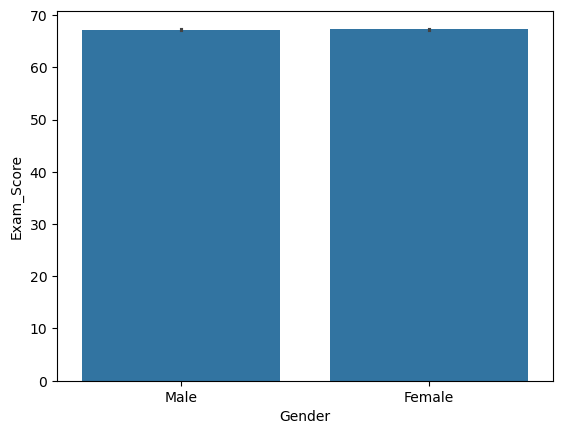

In [92]:
sns.barplot(x=df['Gender'],y=df['Exam_Score'])

In [93]:
Gender_code = df['Gender'].astype('category').cat.codes

In [95]:
corelation = Gender_code.corr(df['Exam_Score'])   
print(f"Correlation between Gender and Exam Score: {corelation}")

Correlation between Gender and Exam Score: -0.002032326756631506
